In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,1
1,1,35381,1860-01-02,46,1
2,1,35381,1860-01-03,31,1
3,1,35381,1860-01-04,37,1
4,1,35381,1860-01-05,31,1
...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9
59470,1,35381,2022-10-28,-9999,9
59471,1,35381,2022-10-29,-9999,9
59472,1,35381,2022-10-30,-9999,9


# Show certain rows

In [4]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,1
11,1,35381,1860-01-12,-18,1
12,1,35381,1860-01-13,-27,1
13,1,35381,1860-01-14,-26,1
14,1,35381,1860-01-15,-37,1
15,1,35381,1860-01-16,-9,1
16,1,35381,1860-01-17,7,1
17,1,35381,1860-01-18,-6,1
18,1,35381,1860-01-19,-16,1
19,1,35381,1860-01-20,-19,1


# Show certain columns

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [6]:
df[["   TG", "    DATE"]]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59469,-9999,2022-10-27
59470,-9999,2022-10-28
59471,-9999,2022-10-29
59472,-9999,2022-10-30


In [7]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,1
1,1,35381,1860-01-02,46,1
2,1,35381,1860-01-03,31,1
3,1,35381,1860-01-04,37,1
4,1,35381,1860-01-05,31,1
...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9
59470,1,35381,2022-10-28,-9999,9
59471,1,35381,2022-10-29,-9999,9
59472,1,35381,2022-10-30,-9999,9


# Simple statistics and filtering

In [8]:
# Average temperature
# Exclude -9999 (means No Data) and divided by 10 to get the real temperature
df.loc[df["   TG"] != -9999]["   TG"].mean() / 10

6.360787526128467

In [9]:
# Max temperature
# Exclude -9999 (means No Data) and divided by 10 to get the real temperature
df.loc[df["   TG"] != -9999]["   TG"].max() / 10

26.2

In [10]:
# Min temperature
# Exclude -9999 (means No Data) and divided by 10 to get the real temperature
df.loc[df["   TG"] != -9999]["   TG"].min() / 10

-28.8

# Histogram for temperature

<AxesSubplot: >

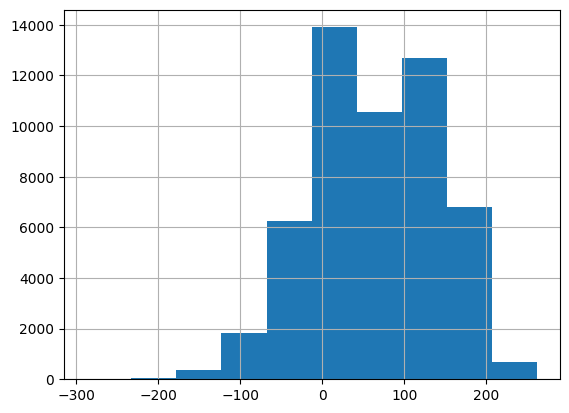

In [11]:
df.loc[df["   TG"] != -9999]["   TG"].hist()

# Get certain cells

In [12]:
# Get a row based on the date
df.loc[df["    DATE"] == "1860-01-05"]

,STAID,SOUID,DATE,TG,Q_TG
4,1,35381,1860-01-05,31,1


In [13]:
# Get real temperature of one date
df.loc[df["    DATE"] == "1860-01-05"]["   TG"].squeeze() / 10

3.1

In [14]:
# Get a row based on the max temperature
max_temp = df.loc[df["   TG"] != -9999]["   TG"].max()
df.loc[df["   TG"] == max_temp]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,1


In [15]:
# Get the date of the max temperature
df.loc[df["   TG"] == max_temp]["    DATE"].squeeze()

Timestamp('1868-08-16 00:00:00')

In [16]:
# Specific cell
df.loc[3, "   TG"]

37

# Calculate a new column out of existing column

In [17]:
# Create new column where all -9999 are replaced for NaN value
df["TG0"] = df["   TG"].mask(df["   TG"] == -9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG0
0,1,35381,1860-01-01,21,1,21.0
1,1,35381,1860-01-02,46,1,46.0
2,1,35381,1860-01-03,31,1,31.0
3,1,35381,1860-01-04,37,1,37.0
4,1,35381,1860-01-05,31,1,31.0
...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,NaN
59470,1,35381,2022-10-28,-9999,9,NaN
59471,1,35381,2022-10-29,-9999,9,NaN
59472,1,35381,2022-10-30,-9999,9,NaN


In [18]:
df["TG"] = df["TG0"] / 10

In [19]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG
0,1,35381,1860-01-01,21,1,21.0,2.1
1,1,35381,1860-01-02,46,1,46.0,4.6
2,1,35381,1860-01-03,31,1,31.0,3.1
3,1,35381,1860-01-04,37,1,37.0,3.7
4,1,35381,1860-01-05,31,1,31.0,3.1
...,...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,NaN,NaN
59470,1,35381,2022-10-28,-9999,9,NaN,NaN
59471,1,35381,2022-10-29,-9999,9,NaN,NaN
59472,1,35381,2022-10-30,-9999,9,NaN,NaN


In [20]:
df["Fahrenheit"] = df["TG"] * (9 / 5) + 32

In [21]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG,Fahrenheit
0,1,35381,1860-01-01,21,1,21.0,2.1,35.78
1,1,35381,1860-01-02,46,1,46.0,4.6,40.28
2,1,35381,1860-01-03,31,1,31.0,3.1,37.58
3,1,35381,1860-01-04,37,1,37.0,3.7,38.66
4,1,35381,1860-01-05,31,1,31.0,3.1,37.58
...,...,...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,NaN,NaN,NaN
59470,1,35381,2022-10-28,-9999,9,NaN,NaN,NaN
59471,1,35381,2022-10-29,-9999,9,NaN,NaN,NaN
59472,1,35381,2022-10-30,-9999,9,NaN,NaN,NaN


# Plotting

<AxesSubplot: >

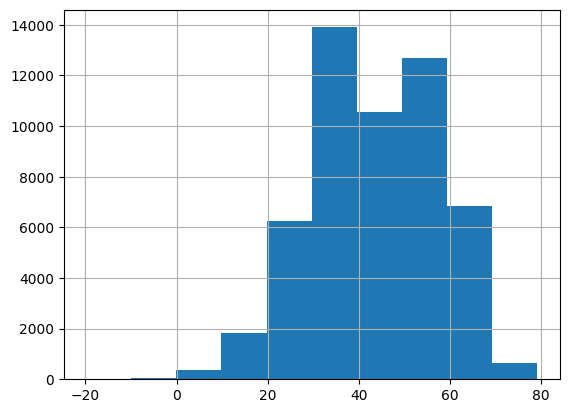

In [22]:
df["Fahrenheit"].hist()

<AxesSubplot: xlabel='    DATE'>

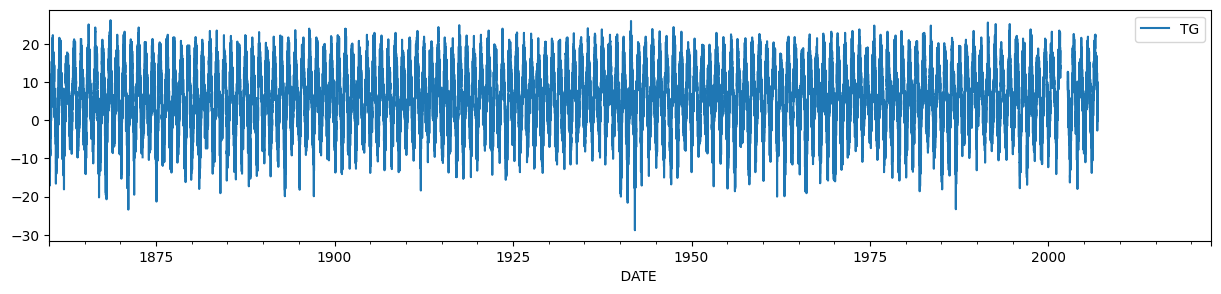

In [23]:
df.plot(x="    DATE", y="TG", figsize=(15, 3))

<AxesSubplot: xlabel='    DATE'>

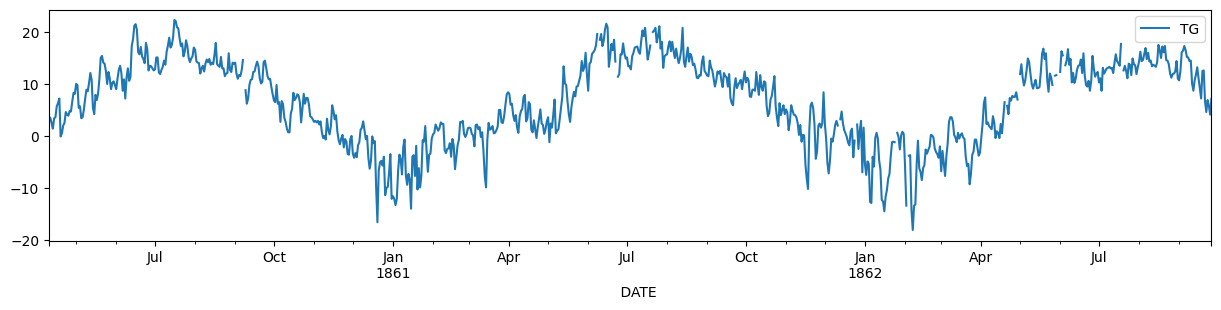

In [24]:
df[100:1000].plot(x="    DATE", y="TG", figsize=(15, 3))